In [2]:
import pandas as pd
import nltk
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('spotify_reviews.csv')
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lance\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lance\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973


In [3]:
def stars_to_sentiment(stars):
    if stars <= 2:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(stars_to_sentiment)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative
...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive


In [4]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_content'] = df['content'].apply(preprocess_text)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment,processed_content
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive,good
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive,love app much using spotify 2 years different ...
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive,perfect
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive,best around music streaming app used family pl...
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative,fr gatekeeping play button songs
...,...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral,decent music streaming app around right kinks ...
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive,premium user years spotify fantastic service u...
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral,lot ads sudden even watch video want uninterru...
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive,ui could better think search bar times liked s...


In [5]:
df_reviews = df[['processed_content', 'score', 'sentiment']]
df_reviews

,processed_content,score,sentiment
0,good,4,positive
1,love app much using spotify 2 years different ...,5,positive
2,perfect,5,positive
3,best around music streaming app used family pl...,5,positive
4,fr gatekeeping play button songs,1,negative
...,...,...,...
84160,decent music streaming app around right kinks ...,3,neutral
84161,premium user years spotify fantastic service u...,4,positive
84162,lot ads sudden even watch video want uninterru...,3,neutral
84163,ui could better think search bar times liked s...,4,positive


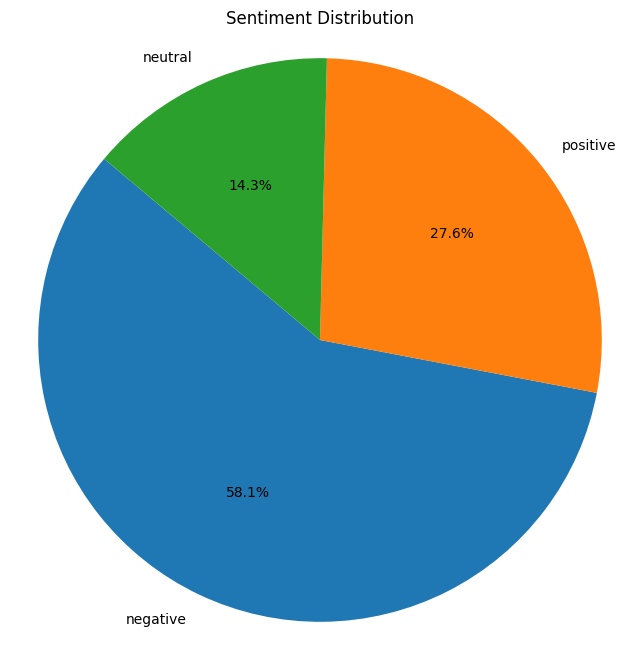

In [6]:
from matplotlib import pyplot as plt
import numpy as np

sentiment_count = df_reviews['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

def augment_text(text, num_augmentations=1):
    if not isinstance(text, str) or len(text) < 5:
        return [text] * num_augmentations
    augmented_texts = [text]
    words = text.split()
    if len(words) <= 3:
        return [text] * num_augmentations
    for _ in range(num_augmentations):
        num_to_remove = max(1, int(len(words) * 0.1))
        remove_indices = np.random.choice(range(len(words)), num_to_remove, replace=False)
        new_text = ' '.join([words[i] for i in range(len(words)) if i not in remove_indices])
        augmented_texts.append(new_text)
        if len(words) > 5:
            mid_words = words[1:-1]
            np.random.shuffle(mid_words)
            shuffled_text = ' '.join([words[0]] + mid_words + [words[-1]])
            augmented_texts.append(shuffled_text)
    return augmented_texts

def create_balanced_data(df):
    sentiment_counts = df['sentiment'].value_counts()
    max_samples = sentiment_counts.max()
    balanced_texts = []
    balanced_sentiments = []
    for sentiment in ['positive', 'negative', 'neutral']:
        sentiment_df = df[df['sentiment'] == sentiment]
        current_count = len(sentiment_df)
        if current_count < max_samples:
            augmentations_needed = int(np.ceil((max_samples - current_count) / current_count))
            for _, row in sentiment_df.iterrows():
                balanced_texts.append(row['processed_content'])
                balanced_sentiments.append(sentiment)
                augmented = augment_text(row['processed_content'], augmentations_needed)
                for aug_text in augmented[1:]:
                    balanced_texts.append(aug_text)
                    balanced_sentiments.append(sentiment)
                    if balanced_sentiments.count(sentiment) >= max_samples:
                        break
        else:
            sampled_df = sentiment_df.sample(max_samples, replace=False)
            balanced_texts.extend(sampled_df['processed_content'].tolist())
            balanced_sentiments.extend([sentiment] * max_samples)
    return balanced_texts, balanced_sentiments

# Create a balanced dataset using augmentation
balanced_texts, balanced_sentiments = create_balanced_data(df_reviews)
balanced_df = pd.DataFrame({
    'processed_content': balanced_texts,
    'sentiment': balanced_sentiments
})

# Train-test split with stratification
X_train, _, y_train, _ = train_test_split(
    balanced_df['processed_content'],
    balanced_df['sentiment'],
    test_size=0.2,
    random_state=42,
    stratify=balanced_df['sentiment']
)

_, orig_X_test, _, orig_y_test = train_test_split(
    df_reviews['processed_content'],
    df_reviews['sentiment'],
    test_size=0.2,
    random_state=42
)

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True,
    use_idf=True,
    smooth_idf=True
)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(orig_X_test)


In [11]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)
print("Classification Report")
print(classification_report(orig_y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

    negative       0.94      0.93      0.93      9791
     neutral       0.80      0.81      0.80      2405
    positive       0.90      0.91      0.91      4637

    accuracy                           0.91     16833
   macro avg       0.88      0.88      0.88     16833
weighted avg       0.91      0.91      0.91     16833



In [12]:
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    vectorized_review = vectorizer.transform([processed_review])
    sentiment = model.predict(vectorized_review)[0]
    return sentiment


In [13]:
new_review="I don't like how much I love this app"
print(f"Predicted:sentiment: {predict_sentiment(new_review)}")

Predicted:sentiment: positive


In [65]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']